In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
all_models_pr = dict()
each_time = dict()

pr_df = pd.read_csv(f'ARIMA_10min_pr.csv', index_col=0)
all_models_pr['Buy&Hold'] = pr_df['buy_and_hold'] -1
each_time['Buy&Hold'] = pd.to_datetime(pr_df.index).values

model_names = ['ARIMA', 'LGBM', 'Logistic', 'XGBoost', 'LSTM']
for model_name in model_names:
    pr_df = pd.read_csv(f'{model_name}_10min_pr.csv', index_col=0)

    all_models_pr[model_name] = pr_df['long_short']
    each_time[model_name] = pd.to_datetime(pr_df.index).values

<Figure size 1500x800 with 0 Axes>

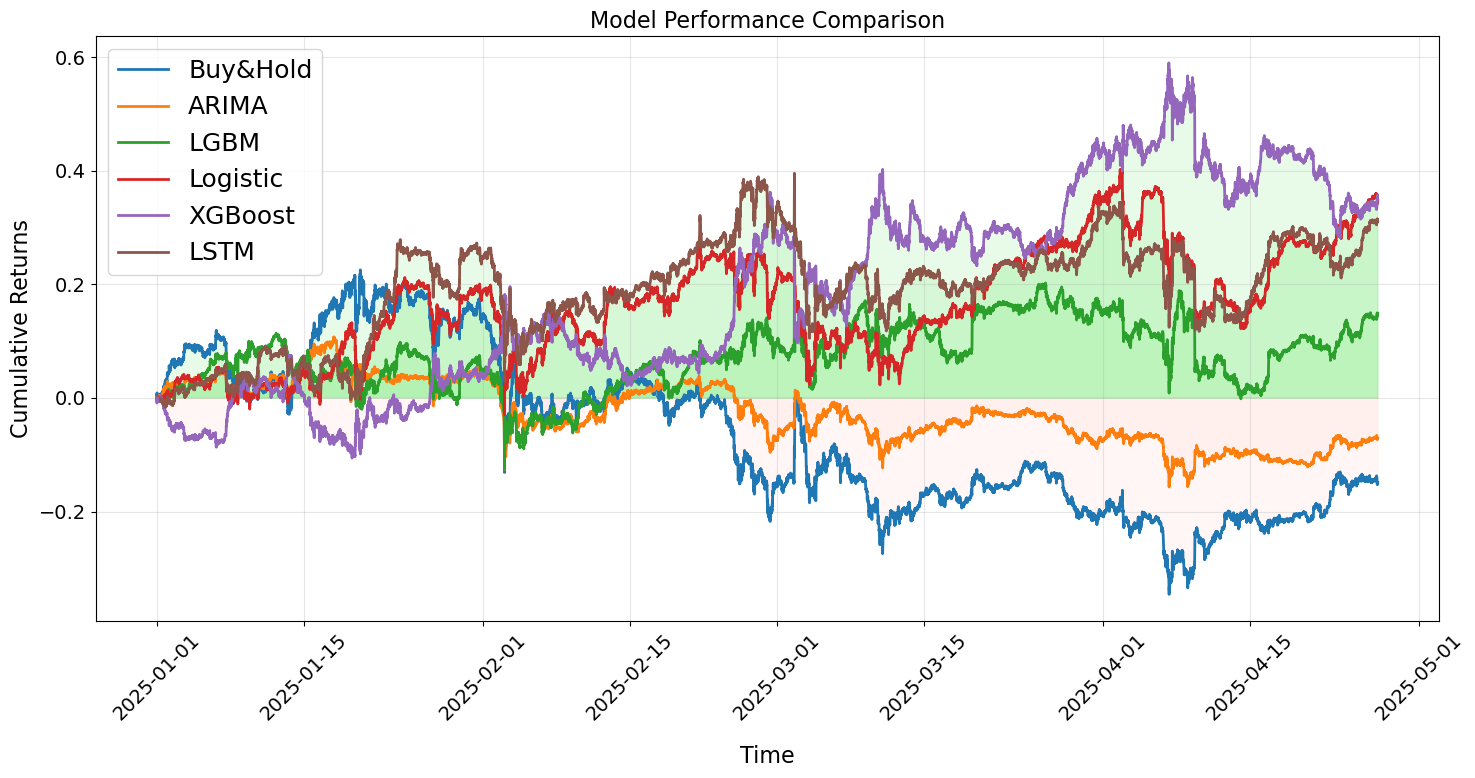

In [8]:
plt.figure(figsize=(15, 8))
plt.rcdefaults()
plt.rcParams.update({
    'font.size': 14,
    'axes.labelsize': 16,
    'axes.titlesize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 18
})

plt.figure(figsize=(15, 8))

min_time = min(each_time[model][0] for model in all_models_pr.keys())
max_time = max(each_time[model][-1] for model in all_models_pr.keys())

for model, returns in all_models_pr.items():
    times = each_time[model]
    plt.fill_between(times, returns, 0, where=(returns >= 0), 
                    alpha=0.2, color='lightgreen')
    plt.fill_between(times, returns, 0, where=(returns < 0),
                    alpha=0.3, color='mistyrose')

for i, (model, returns) in enumerate(all_models_pr.items()):
    plt.plot(each_time[model], returns, label=model.replace('_', ' '), linewidth=2)

plt.xlabel('Time', labelpad=15)
plt.ylabel('Cumulative Returns')
plt.title('Model Performance Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()